# <p style="text-align: center;"> Final Project - Introduction to Data Science</p>
# <p style="text-align: center;"> <b> Data Exploration: Answer Questions </b></p>
---

## Member Information
| Name              | ID       |
|-------------------|----------|
|Tran Đinh Quang    | 21127406 |
|Nguyen Hong Hanh   | 21127503 |
|Đo Quoc Tri  | 21127556 |
| Nguyen Khanh Nhan | 21127657         |


## Table of contents



---

## Import

In [10]:
#import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OneHotEncoder

warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

## Read data and split into numeric and categorical set

In [11]:
#read data
raw_data = pd.read_csv('../data/raw.csv')

In [22]:
raw_data_numeric = raw_data.select_dtypes(include='number')
raw_data_categorical = raw_data.select_dtypes(exclude='number')

## Question 1

**Question**: Does datetime has any relation ship with other features?

**Benefit**: Discovering the patterns of weather changes over many years helps us predict the weather.

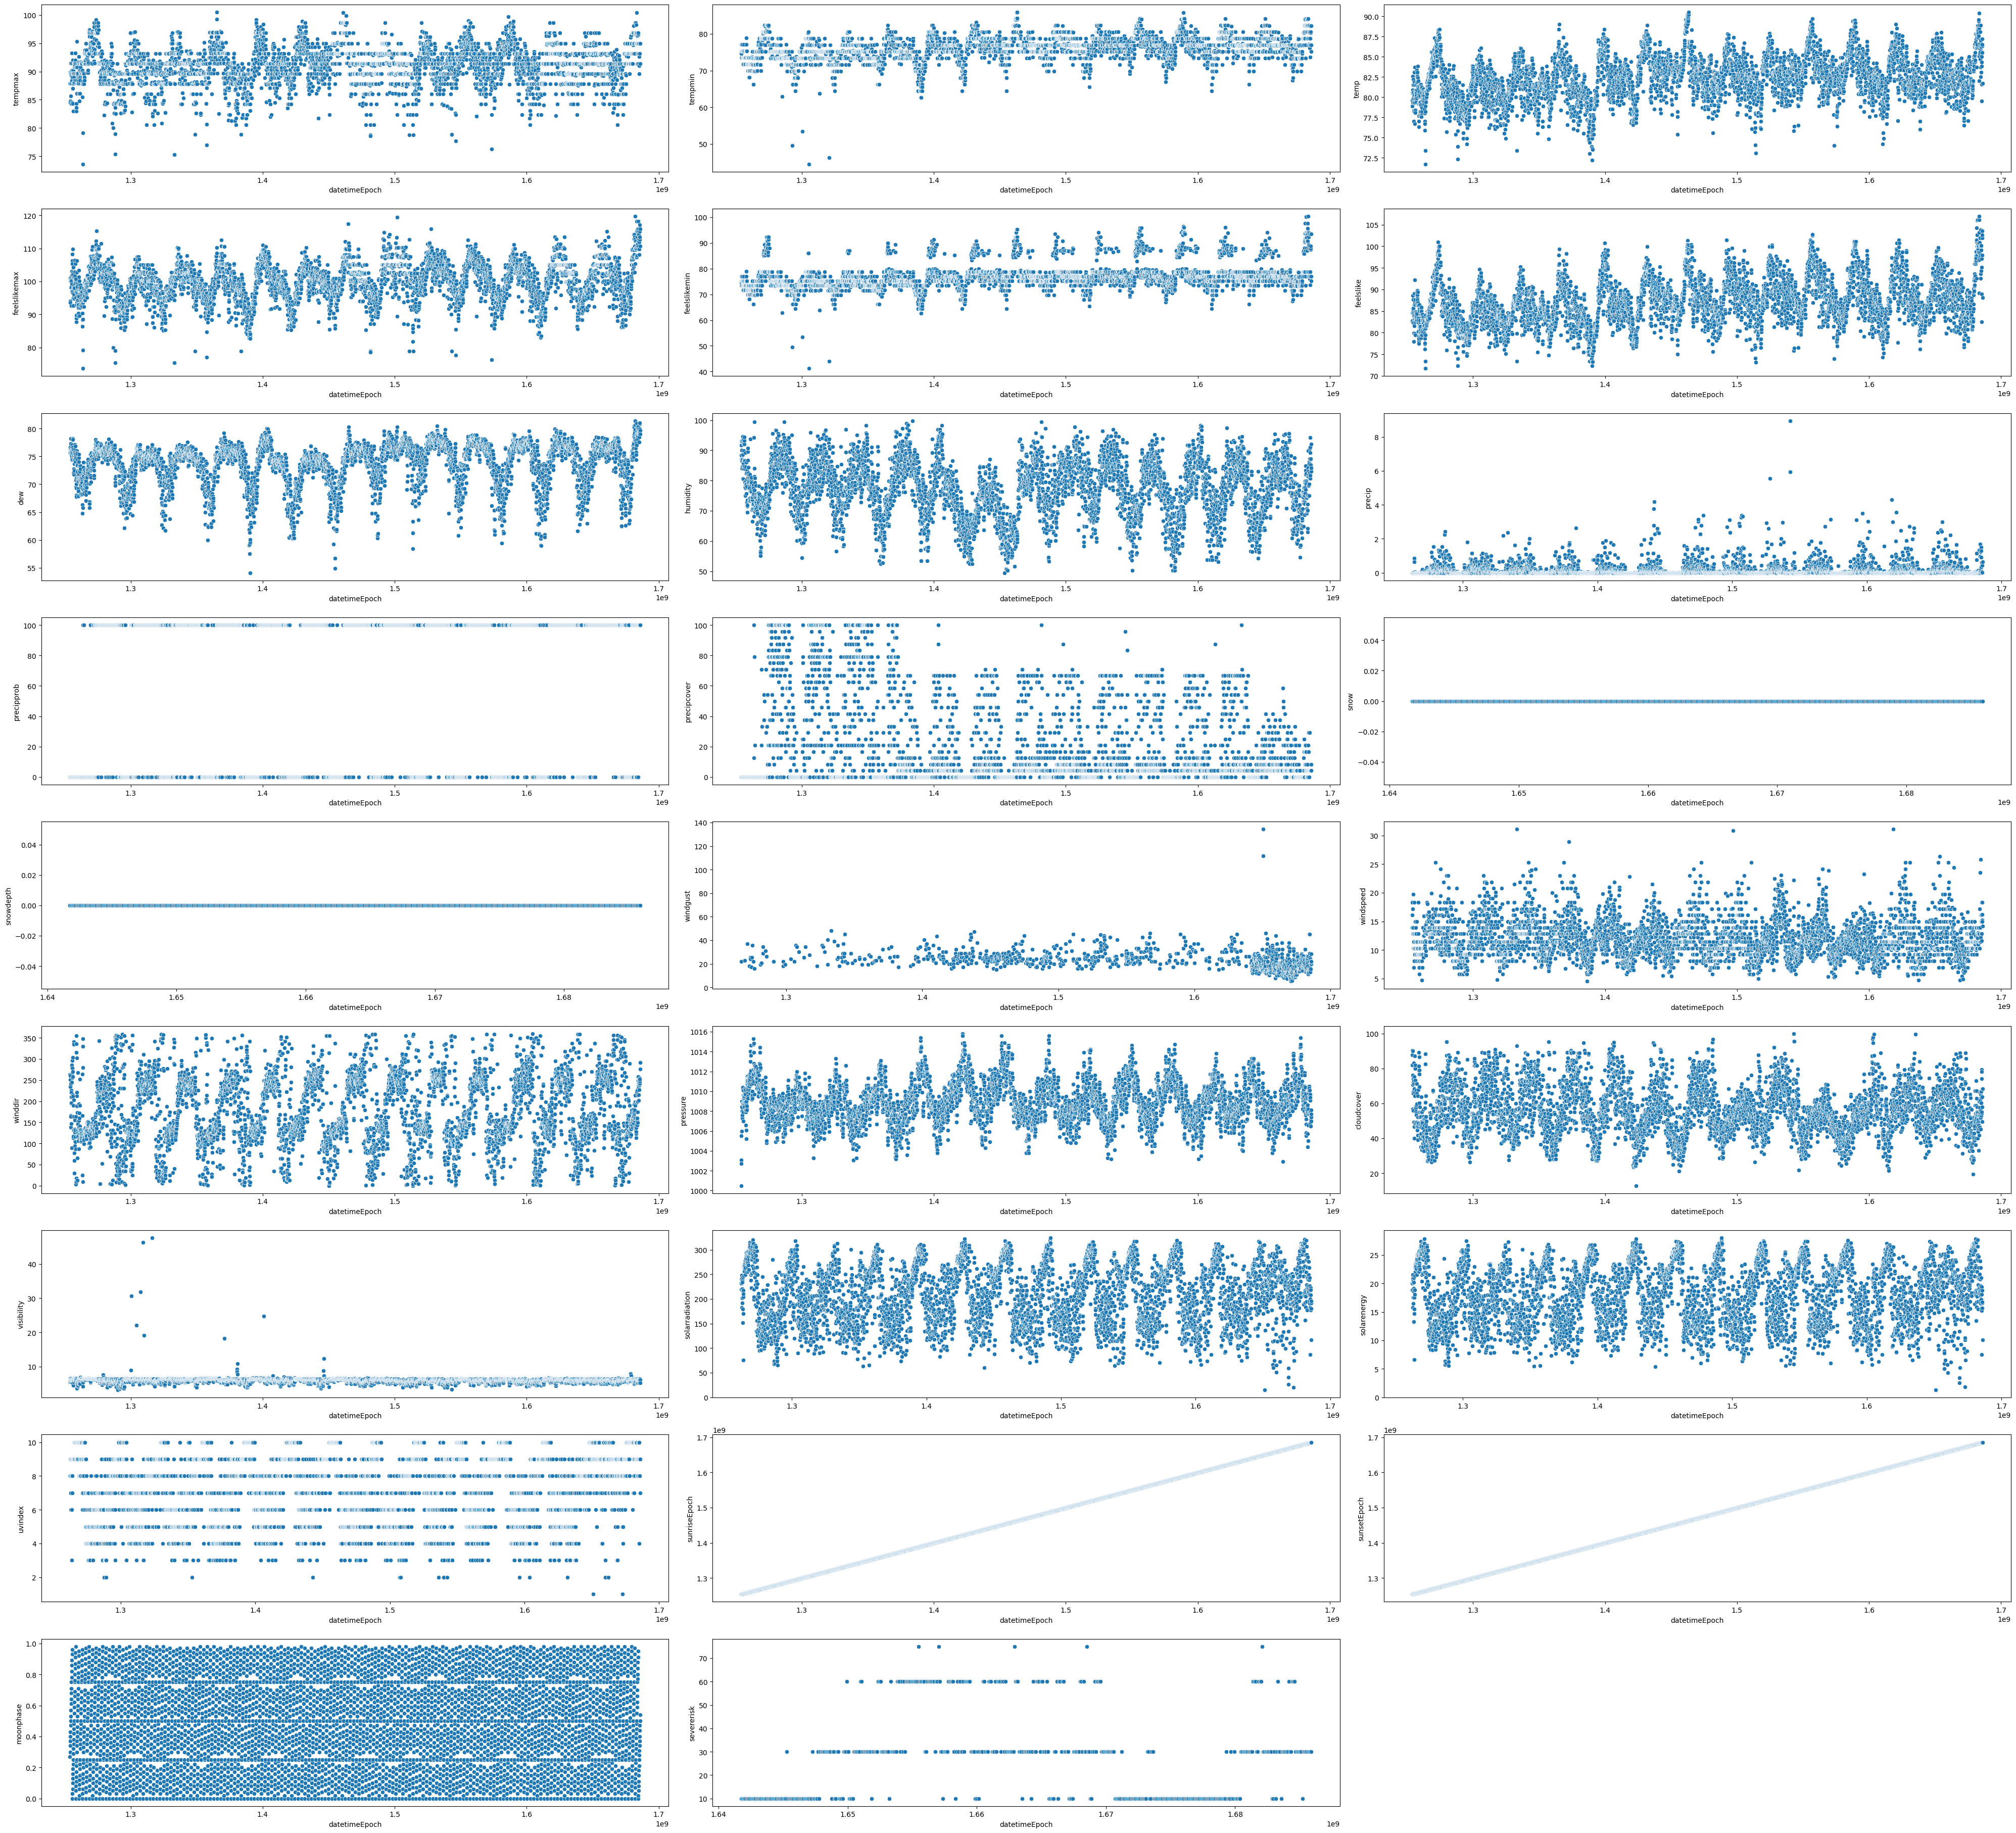

In [4]:
#draw plot for numeric data to get the relationship between datetimeEpoch and other variables

plt.figure(figsize=(40, 40))  # create a new figure with a larger size
cols = list(raw_data_numeric.columns)  # get the column names
cols.remove('datetimeEpoch')  # remove the datetimeEpoch column
for i in range(len(cols)):
    plt.subplot(10, 3, i + 1)  # create a subplot for each column
    sns.scatterplot(x='datetimeEpoch', y=cols[i], data=raw_data_numeric)

plt.tight_layout()  # adjust the spacing between subplots
plt.show()  # display the figure


**Conclusion**:

We can observe that variables undergoing changes follow patterns over time and tend to repeat trends annually.

## Question 2

**Question 2**: How does datetime effect the weather condition?

**Benefit**: We can predict the condition(rain, not rain)?

In [5]:
raw_data_categorical.columns

Index(['datetime', 'preciptype', 'sunrise', 'sunset', 'conditions',
       'description', 'icon', 'stations', 'source'],
      dtype='object')

In [6]:
temp = raw_data.copy()
encoder = OneHotEncoder(sparse_output=False)
encoded_col = encoder.fit_transform(temp['icon'].values.reshape(-1, 1)).astype(int)
encoded_df = pd.DataFrame(encoded_col, columns=encoder.get_feature_names_out(['icon']))
encoded_df.head()

icon_clear-day  icon_cloudy  icon_partly-cloudy-day  icon_rain
0               0            0                       1          0
1               0            1                       0          0
2               0            0                       1          0
3               0            0                       1          0
4               0            0                       1          0

In [7]:
#concatenate the encoded dataframe with the original dataframe
temp = pd.concat([temp, encoded_df], axis=1)
#remove the original column
temp.drop('icon', axis=1, inplace=True)

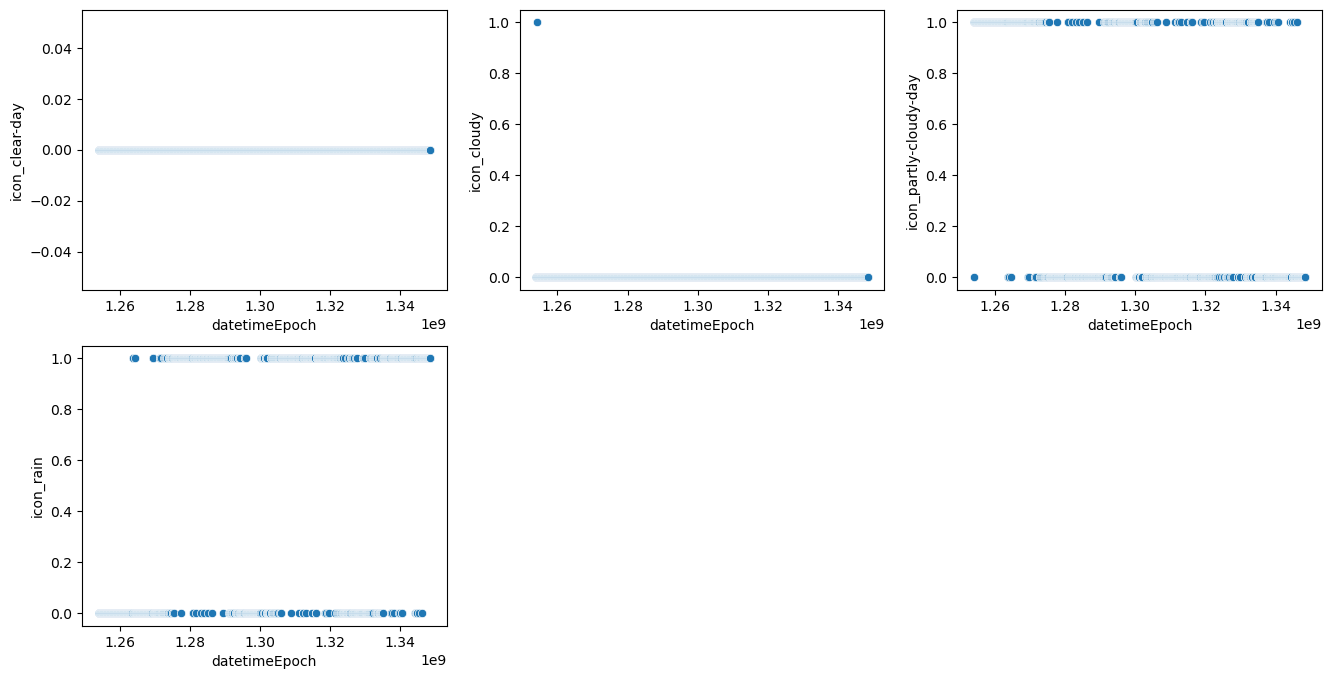

In [8]:
#draw plot for categorical data to get the relationship between datetimeEpoch and other variables
plt.figure(figsize=(16, 8))  # create a new figure with a larger size
cols = ['icon_clear-day', 'icon_cloudy', 'icon_partly-cloudy-day', 'icon_rain']
for col in cols:
    plt.subplot(2, 3, cols.index(col) + 1)  # create a subplot for each column
    sns.scatterplot(x='datetimeEpoch', y=col, data=temp.head(3 * 365))

array([[<Axes: title={'center': 'icon_clear-day'}>,
        <Axes: title={'center': 'icon_cloudy'}>],
       [<Axes: title={'center': 'icon_partly-cloudy-day'}>,
        <Axes: title={'center': 'icon_rain'}>]], dtype=object)

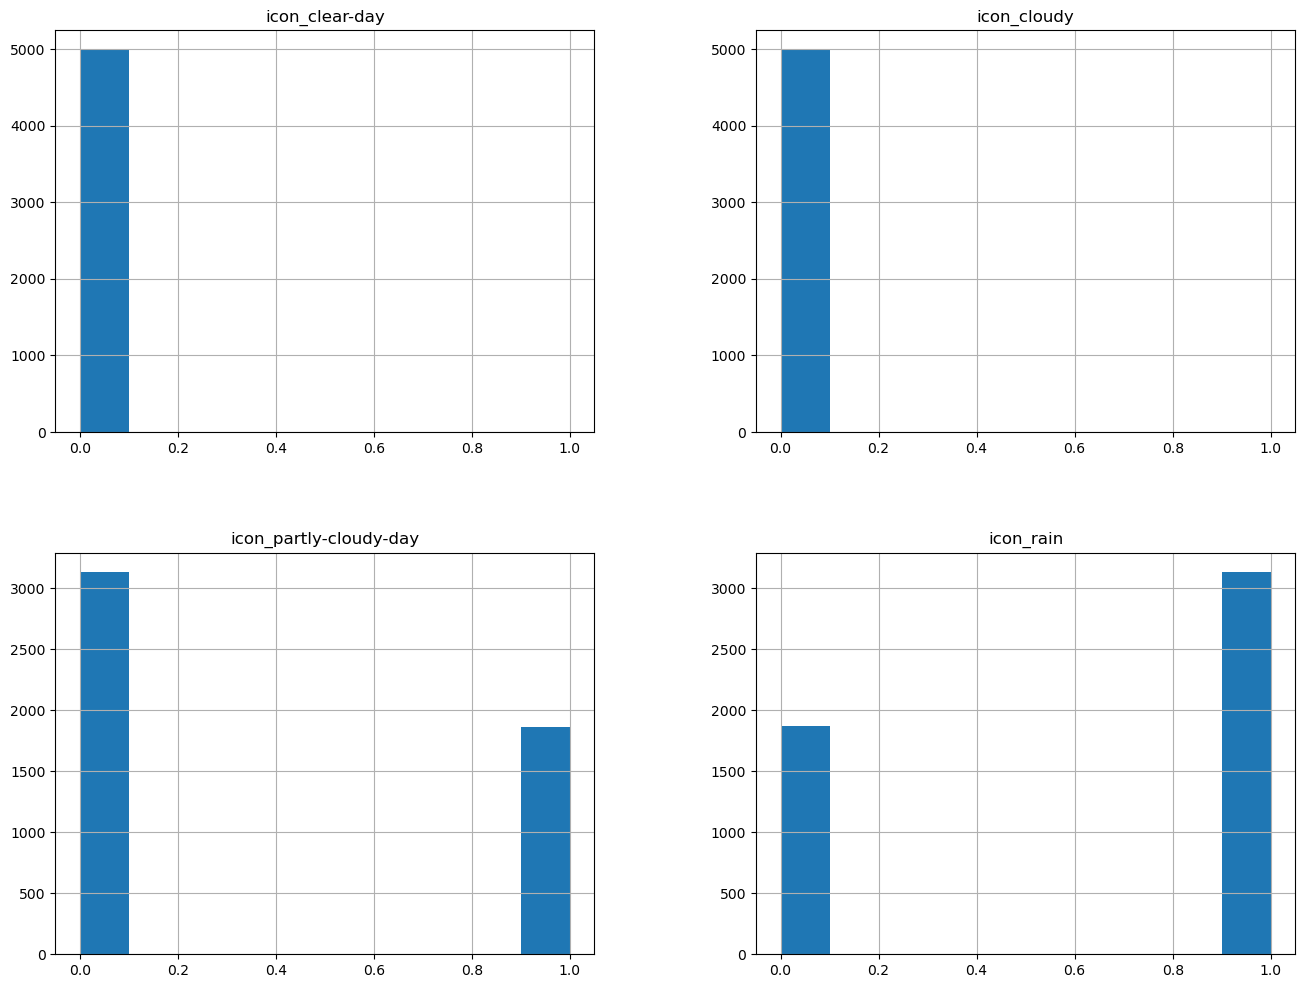

In [9]:
encoded_df.hist(figsize=(16, 12))

**Conclusion**:

We observe that the weather is divided into two main types, 'partly-cloudy-day' and 'rain'. The weather throughout the year is distinctly divided into two seasons: the rainy season in the first half of the year and the relatively dry season during the remaining period.

## Question 3

**Question**: Can we predict the weather for the day based on the time of sunrise?

**Benefit**: We can predict the weather at the beginning of the day.

In [23]:
#make sunrise time column
sunrise_time = raw_data['sunriseEpoch'] - raw_data['datetimeEpoch']
raw_data_numeric['sunriseTime'] = sunrise_time

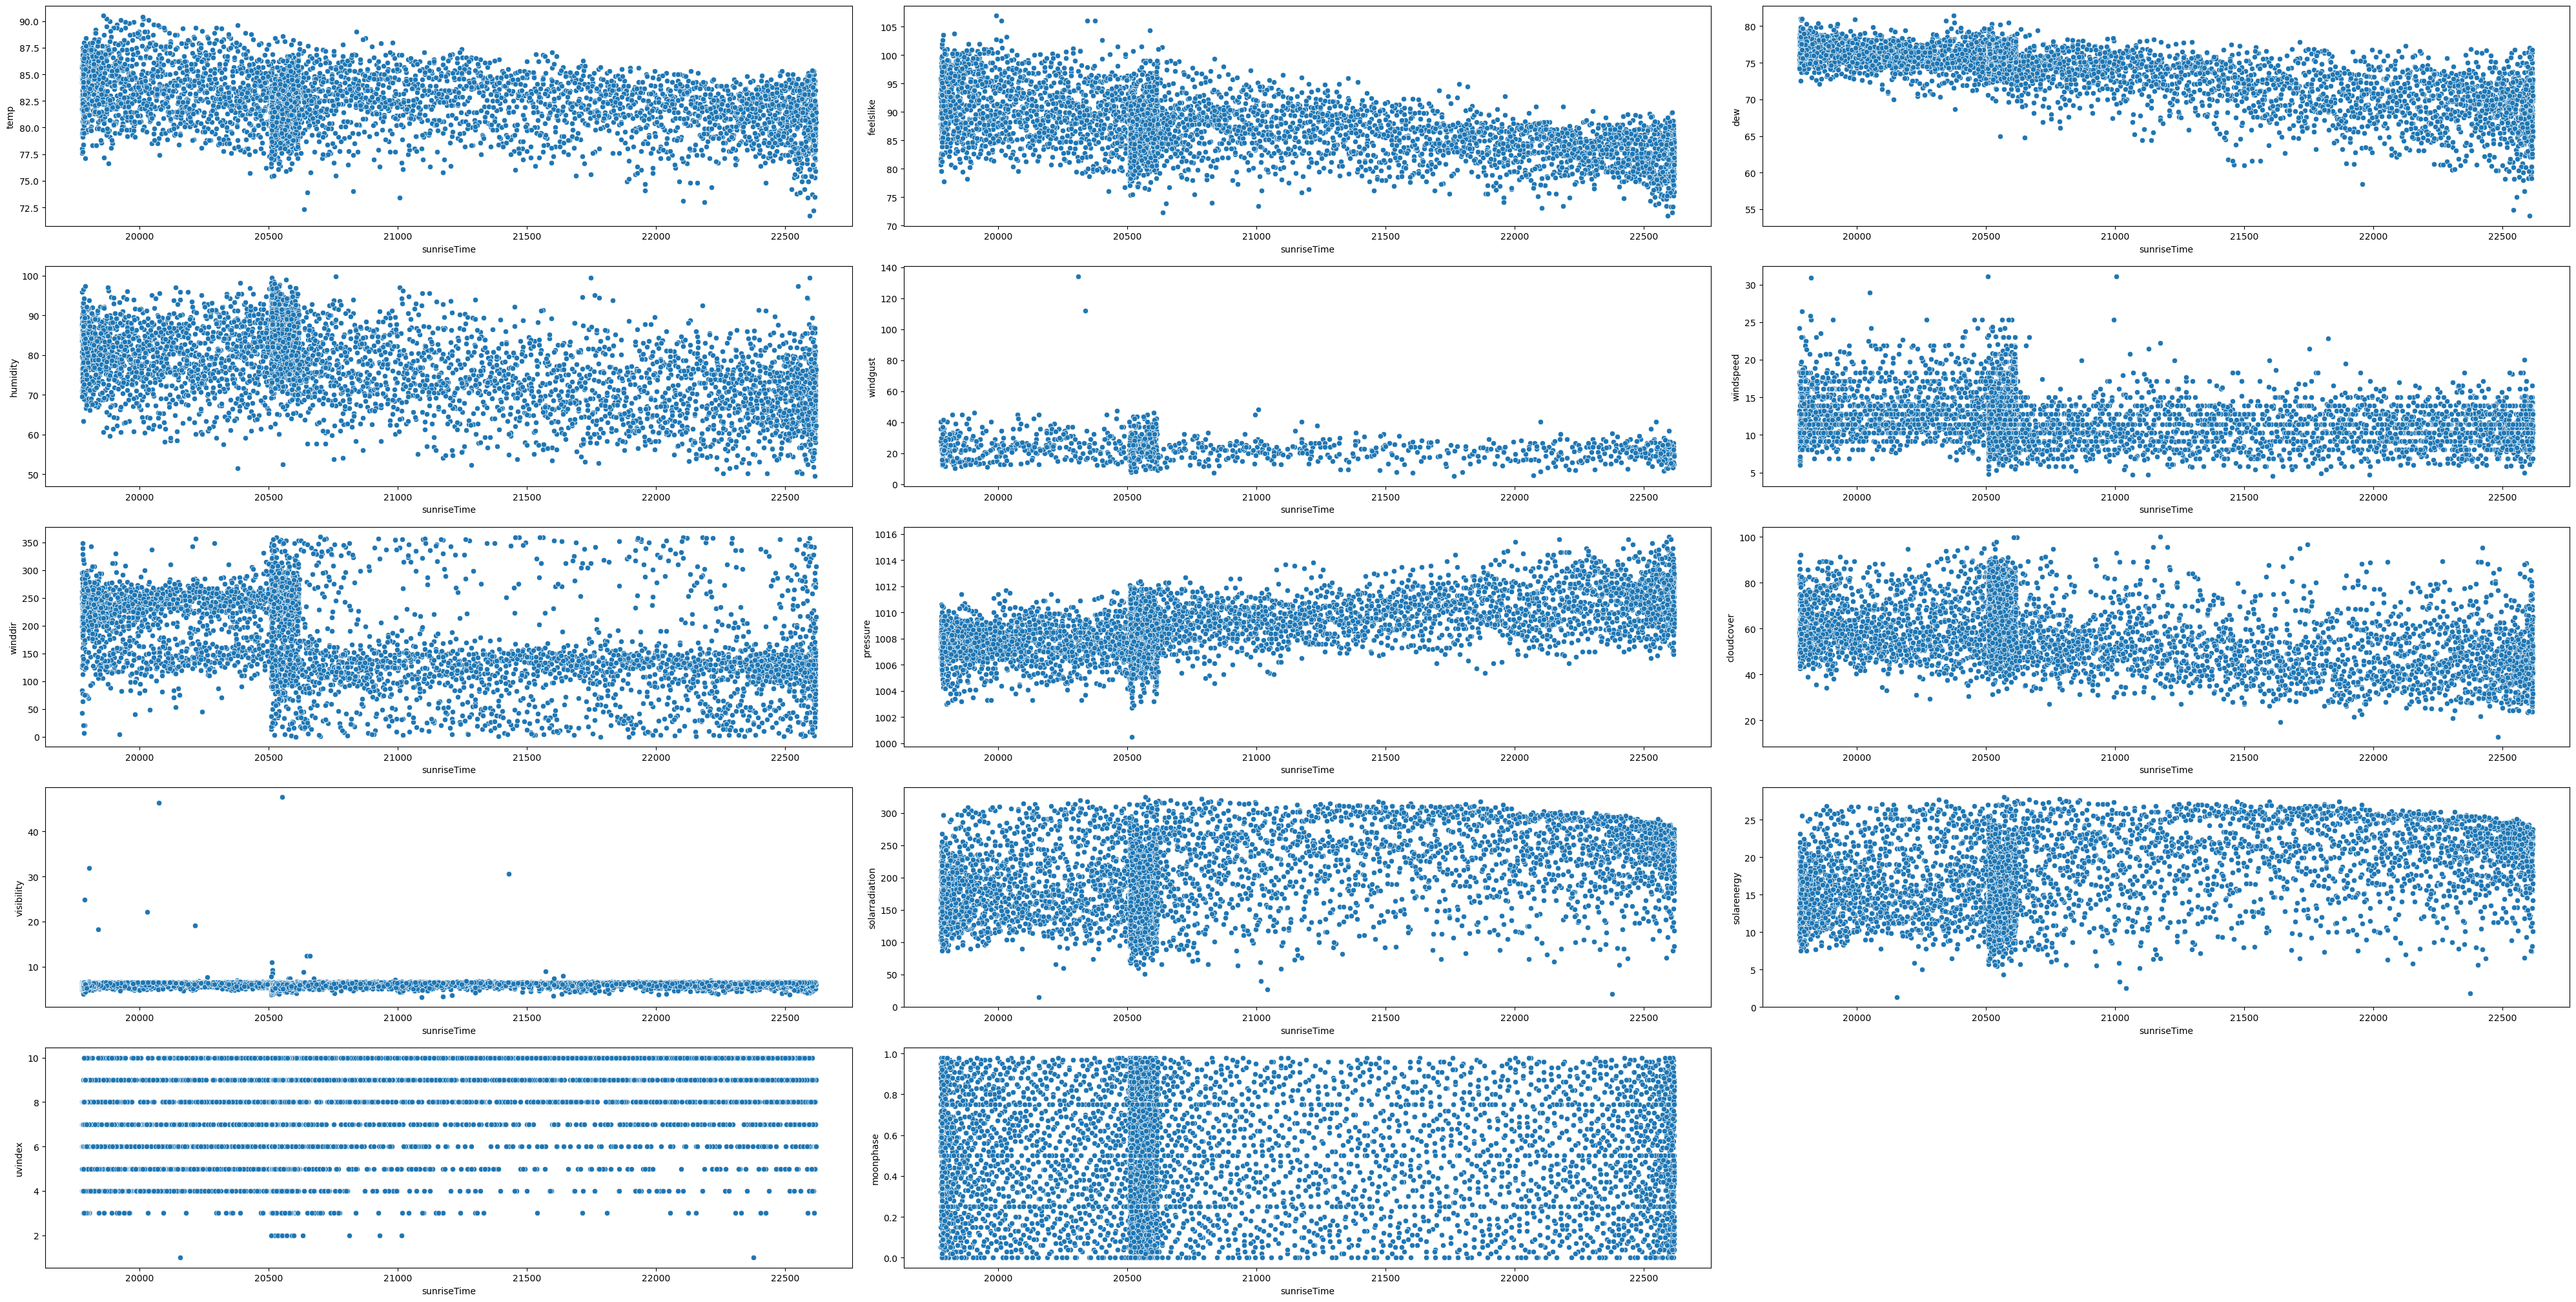

In [30]:
#draw plot for numeric data to get the relationship between datetimeEpoch and other variables

plt.figure(figsize=(40, 40))
cols = ['temp', 'feelslike', 'dew', 'humidity', 'windgust', 'windspeed', 'winddir',
       'pressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy',
       'uvindex', 'moonphase']  # get the column names

for i in range(len(cols)):
    plt.subplot(10, 3, i + 1)  # create a subplot for each column
    sns.scatterplot(x='sunriseTime', y=cols[i], data=raw_data_numeric)

plt.tight_layout()  # adjust the spacing between subplots
plt.show()  # display the figure


**Conclusion**: 
The temperature, humidity, wind speed, and cloud cover tend to decrease as the sunrise time increases. Conversely, the indices related to pressure, solar radiation, solar energy, as well as the level of UV rays, tend to increase.